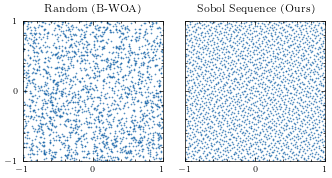

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc
import scienceplots

# style
# plt.style.use(["ieee"])
plt.style.use(["science"])

plt.rcParams.update(
    {
        "font.size": 9,  # General font size
        "axes.titlesize": 7.5,  # Axis title font size
        "axes.labelsize": 8,  # X and Y axis labels
        "xtick.labelsize": 6,  # X-axis tick labels
        "ytick.labelsize": 6,  # Y-axis tick labels
        "legend.fontsize": 6,  # Legend font size
        "axes.linewidth": 0.5,  # Axis line thickness
        "grid.linewidth": 0.5,  # Grid line thickness
    }
)

# Parameters
num_points = 2048
num_features = 2

# Generate random points (Uniform distribution)
np.random.seed(7)
random_points = np.random.uniform(-1, 1, (num_points, num_features))

# Generate Sobol sequence points
sobol_sampler = qmc.Sobol(d=num_features, scramble=True, seed=7)
sobol_points = sobol_sampler.random(n=num_points) * 2 - 1

# Select only the first two dimensions for visualization
random_2d = random_points[:, :2]
sobol_2d = sobol_points[:, :2]

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(3.5, 2), sharey=True)
fig.subplots_adjust(hspace=0.3)

for ax, data, color, title in zip(
    axes,
    [random_2d, sobol_2d],
    ["blue", "green"],
    ["Random (B-WOA)", "Sobol Sequence (Ours)"],
):

    ax.scatter(data[:, 0], data[:, 1], alpha=.7, s=1.5, marker="o", linewidths=0)  # , color=color)
    ax.set_title(title)
    ax.set_aspect('equal', adjustable='box')

    # ax.set_xlabel("Dimension 1")
    # ax.set_ylabel("Dimension 2")

    # Set tick marks only at 0 and 1
    # ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_xticks([-1, 0, 1])
    # ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_yticks([-1, 0, 1])
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    # ax.grid(which="major")

plt.tight_layout()
plt.savefig("random-vs-sobol.pdf", format="pdf", bbox_inches="tight")
plt.show()

/home/mateusz/projects/woa-ofs/.venv/lib/python3.12/site-packages/scipy/stats/_qmc.py:958: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


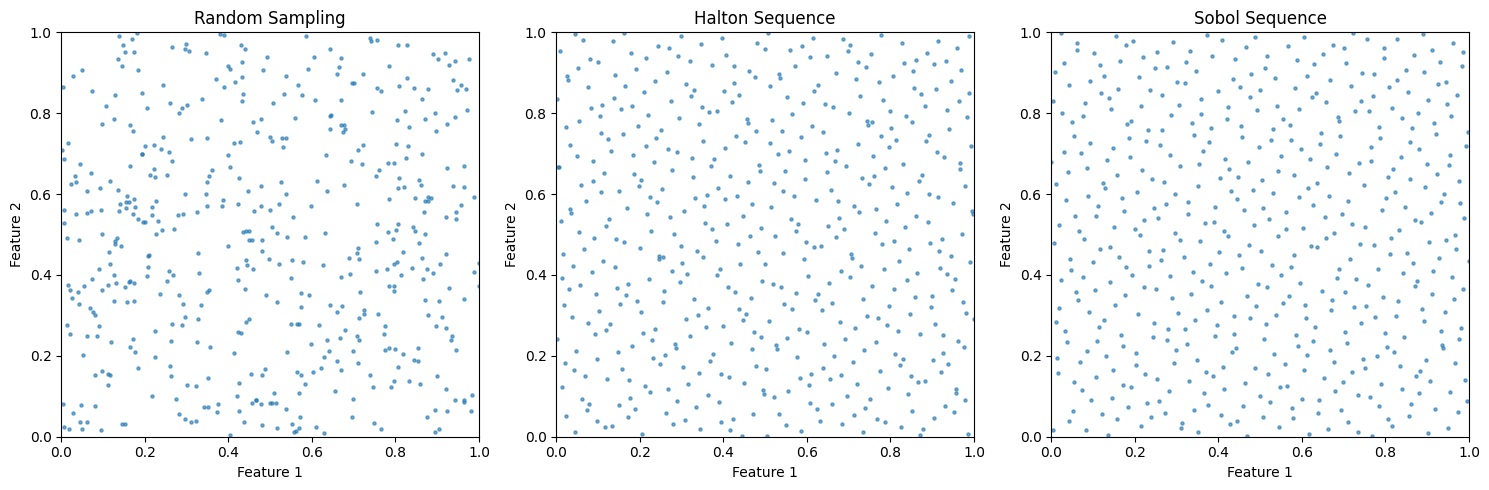

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.qmc import Halton, Sobol

def generate_samples(method, num_samples, num_features):
    if method == "random":
        return np.random.rand(num_samples, num_features)
    elif method == "halton":
        engine = Halton(d=num_features, scramble=True)
        return engine.random(num_samples)
    elif method == "sobol":
        engine = Sobol(d=num_features, scramble=True)
        return engine.random(num_samples)

# Experiment setup
num_samples = 500 
num_features = 2

# Data points generation
random_samples = generate_samples("random", num_samples, num_features)
halton_samples = generate_samples("halton", num_samples, num_features)
sobol_samples = generate_samples("sobol", num_samples, num_features)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ["Random Sampling", "Halton Sequence", "Sobol Sequence"]
samples = [random_samples, halton_samples, sobol_samples]

for ax, sample, title in zip(axes, samples, titles):
    ax.scatter(sample[:, 0], sample[:, 1], s=5, alpha=0.6)
    ax.set_title(title)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()


In [2]:
%%capture

# Make sure to add project root directory to PYTHONPATH
# export PYTHONPATH="${PYTHONPATH}:${pwd}"

# Change directory to project root directory

%cd ..

In [3]:
from src.woa.initialize import *

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

In [4]:
def reduce_and_plot(agents, title, method="PCA", ax=None):
    """Reduces dimensionality and plots agents in 2D space."""
    if method == "PCA":
        reducer = PCA(n_components=2)
    elif method == "tSNE":
        reducer = TSNE(n_components=2, perplexity=30, random_state=42)
    else:
        raise ValueError("Invalid method. Choose 'PCA' or 'tSNE'.")

    reduced_agents = reducer.fit_transform(agents)

    if ax is None:
        plt.figure(figsize=(6, 5))
        plt.scatter(reduced_agents[:, 0], reduced_agents[:, 1], alpha=0.7)
        plt.title(title)
        plt.xlabel("Component 1")
        plt.ylabel("Component 2")
        plt.show()
    else:
        ax.scatter(reduced_agents[:, 0], reduced_agents[:, 1], alpha=0.7)
        ax.set_title(title)
        ax.set_xlabel("Component 1")
        ax.set_ylabel("Component 2")

def plot_density(agents, title, ax):
    """Plots histogram and KDE of feature activation percentages."""
    feature_usage = agents.mean(axis=0)  # Fraction of agents selecting each feature
    sns.histplot(feature_usage, kde=True, ax=ax)
    ax.set_title(f"{title} - Feature Selection Density")
    ax.set_xlabel("Feature Selection Frequency")
    ax.set_ylabel("Density")

def plot_num_features(agents, title, ax):
    """Plots histogram and KDE of num activated features."""
    feature_usage = agents.sum(axis=1)
    sns.histplot(feature_usage, kde=True, ax=ax)
    ax.set_title(f"{title} - Number of Features Density")
    ax.set_xlabel("Number of Selected Features")
    ax.set_ylabel("Density")

/home/mateusz/projects/woa-ofs/.venv/lib/python3.12/site-packages/scipy/stats/_qmc.py:958: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


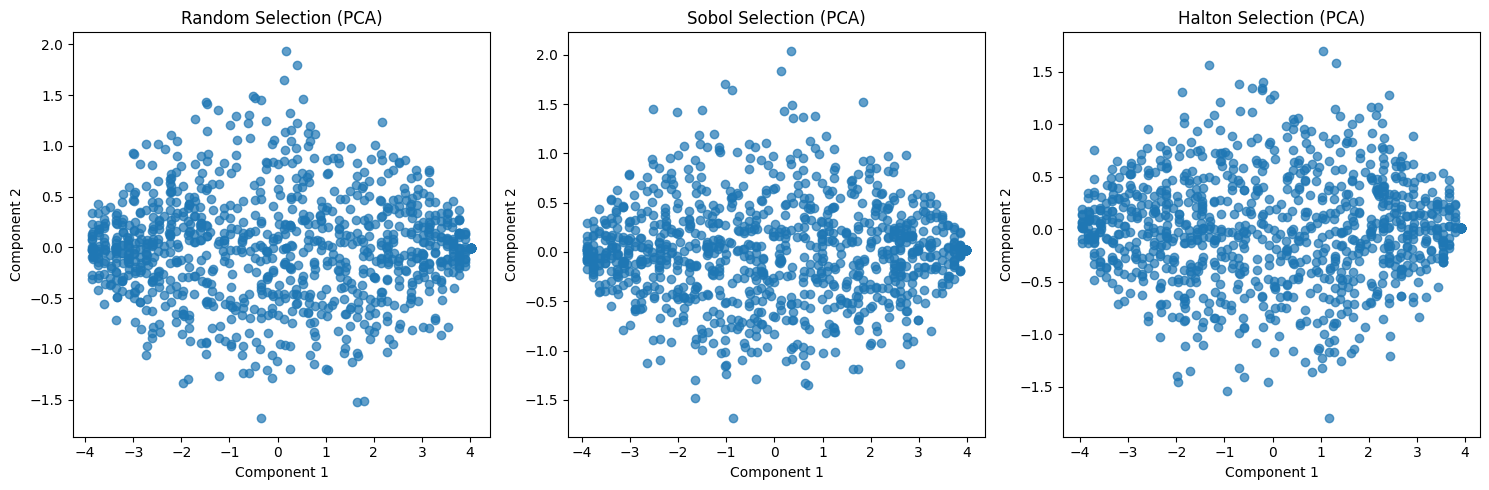

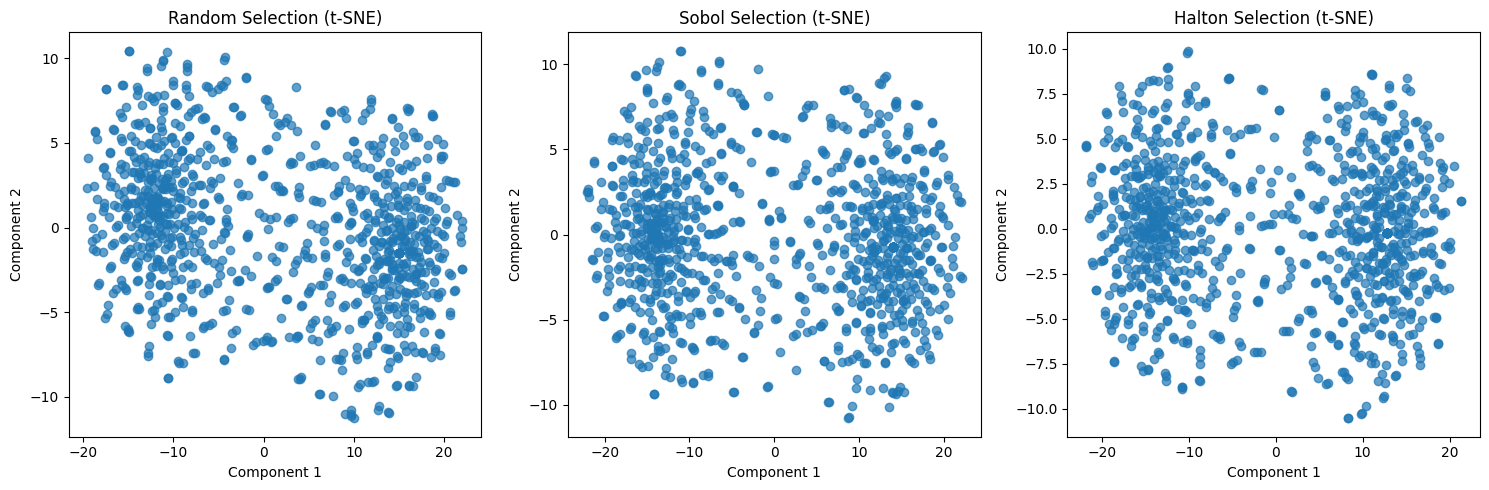

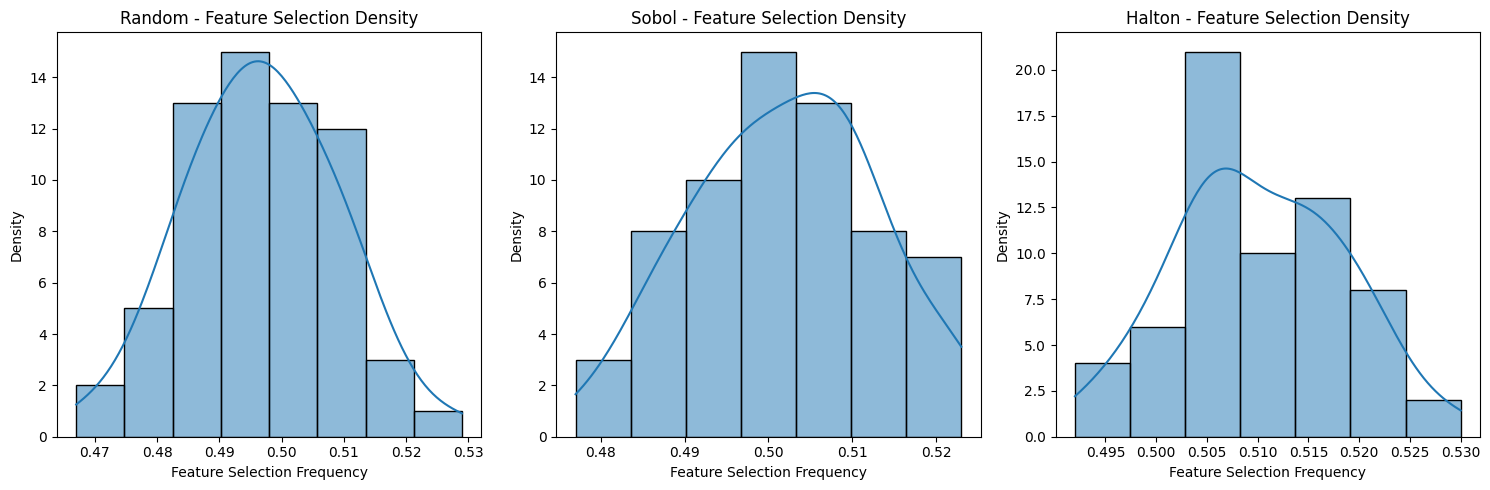

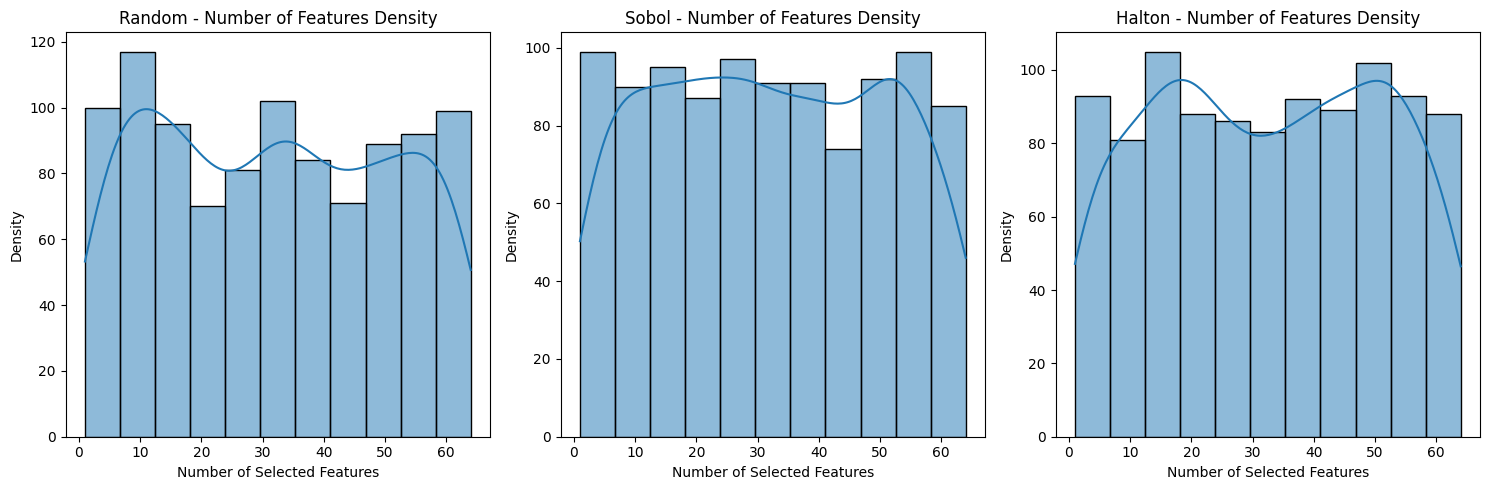

In [5]:
# Generate agents
num_agents = 1000
num_features = 64
k_min, k_max = 1, None

random_agents = initialize_agents_random(num_agents, num_features, k_min, k_max)
sobol_agents = initialize_agents_quasirandom(num_agents, num_features, "sobol", k_min, k_max)
halton_agents = initialize_agents_quasirandom(num_agents, num_features, "halton", k_min, k_max)

# PCA Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
reduce_and_plot(random_agents, "Random Selection (PCA)", method="PCA", ax=axes[0])
reduce_and_plot(sobol_agents, "Sobol Selection (PCA)", method="PCA", ax=axes[1])
reduce_and_plot(halton_agents, "Halton Selection (PCA)", method="PCA", ax=axes[2])
plt.tight_layout()
plt.show()

# t-SNE Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
reduce_and_plot(random_agents, "Random Selection (t-SNE)", method="tSNE", ax=axes[0])
reduce_and_plot(sobol_agents, "Sobol Selection (t-SNE)", method="tSNE", ax=axes[1])
reduce_and_plot(halton_agents, "Halton Selection (t-SNE)", method="tSNE", ax=axes[2])
plt.tight_layout()
plt.show()

# Density Analysis
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plot_density(random_agents, "Random", axes[0])
plot_density(sobol_agents, "Sobol", axes[1])
plot_density(halton_agents, "Halton", axes[2])
plt.tight_layout()
plt.show()

# No Features Analysis
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plot_num_features(random_agents, "Random", axes[0])
plot_num_features(sobol_agents, "Sobol", axes[1])
plot_num_features(halton_agents, "Halton", axes[2])
plt.tight_layout()
plt.show()